# Google Play Store Exploratory Data Analysis

**Author Name:** Haider Rasool Qadri

**Email:** haiderqadri.07@gmail.com

**Github:** [github](https://github.com/HaiderQadri)

**Linkedin:** [linkedin](https://www.linkedin.com/in/haider-rasool-qadri-06a4b91b8/)

# About the Data

## Description
The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

## Context

 While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

## Content

Each app (row) has values for catergory, rating, size, and more.

## Acknowledgements 

This information is scraped from the Google Play Store. This app information would not be available without it.

## Inspiration

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# Purpose of this analysis




1. Which category has the highet number of apps?
2. Which category has the highest number of installations?
3. Which category has the highest number of reviews?
4. Which category has the highet number of ratings?
5. Is there any relationship between size of an app and its rating?
6. Does the price influence the number of installs?
7. What is the average rating of paid apps?
8. What is the distribution of rating based on category?
9. What is the average size of an app?
10. What is average size of gamming app and write total number of installations?
11. What are the number of installations of PUBG MOBILE Game and in which category it falls.
12. Free top 5 rated apps?
13. Paid top 5 rated apps?
14. Top free apps with highest number of reviews?


# Import the liberaries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Load the dataset

In [95]:
df = pd.read_csv('./data/googleplaystore.csv')

# Pre-Processing of data 

In [96]:
# Lets take a sample of data 
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5583,The Aether: Life as a God,FAMILY,4.1,1407,3.4M,"100,000+",Free,0,Everyone 10+,Role Playing,"March 12, 2018",1.0.5,4.0 and up
7862,Emergency Brain CT,MEDICAL,NaN,2,19M,10+,Paid,$0.99,Everyone,Medical,"April 17, 2018",1.0.0,4.1 and up
1899,Magic Tiles 3,GAME,4.5,592504,Varies with device,"50,000,000+",Free,0,Everyone,Music,"August 3, 2018",5.13.007,4.1 and up
4851,Theme eXp - Black Z Light,PERSONALIZATION,4.3,29540,4.3M,"1,000,000+",Free,0,Everyone,Personalization,"June 15, 2016",2.0,5.0 and up
5770,AirWatch Inbox,BUSINESS,2.7,8346,Varies with device,"1,000,000+",Free,0,Everyone,Business,"September 20, 2017",Varies with device,4.0 and up


In [97]:
df.shape

(10841, 13)

### Observations:

- There are 10841 rows and 13 columns in the dataset.
---

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


### Observations

- Total rows = 10841.
- Total columns = 13.
- There is 1 float64, 1 int64 and 11 object datatype columns.
- We can see names of the column and its dtype.
- We can see the there are missing values in the dataset. 
- We can see that there are 3 columns that are of object dtype but these must be of numeric dtype.
  1. Size, 2. Installs and 3. Price
---

In [99]:
# Let's check for duplicated rows
df.duplicated().sum()

483

### Observations

- There are 483 duplicated rows in the dataset.
---

In [100]:
# Let's remove the duplicated rows
df.drop_duplicates(inplace = True)

In [101]:
df.shape

(10358, 13)

### Observations

- After removing duplicates we left with 10358 rows.
---

In [102]:
# Now, let's check for missing values
df.isnull().sum().sort_values(ascending = False)

Rating            1465
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
App                  0
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

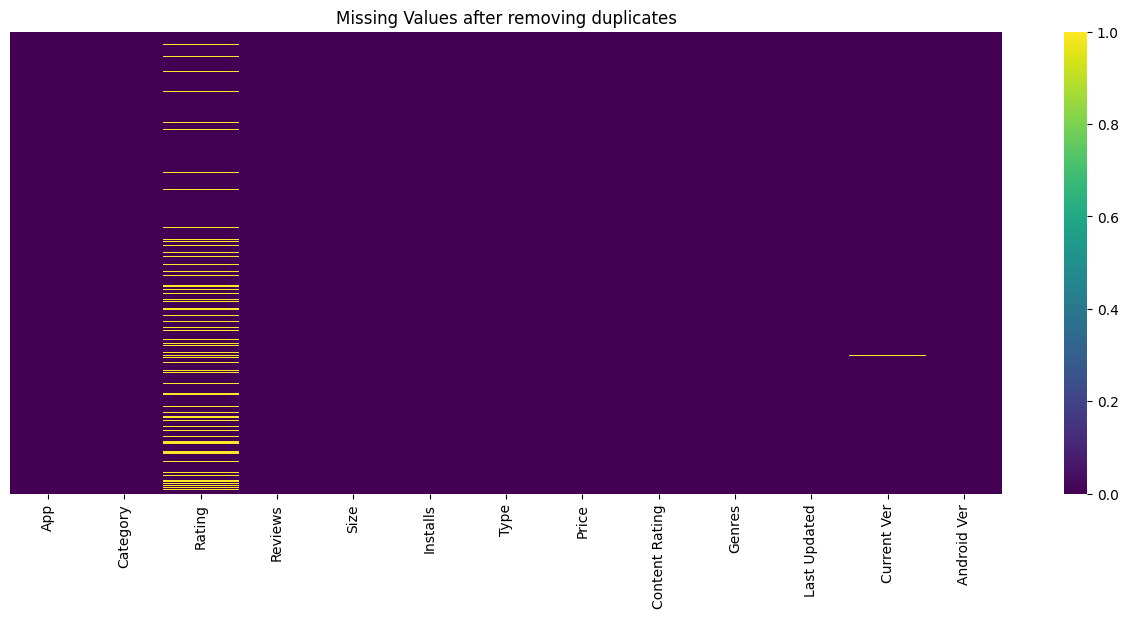

In [103]:
# Let's see missing values in a plot
plt.figure(figsize = (16, 6))
sns.heatmap(df.isnull(), cbar = True, yticklabels = False, cmap='viridis')
plt.title('Missing Values after removing duplicates')
plt.show()

In [104]:
# Let's clean the size column
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

### Observations

- There are may unique values in the size column first we need to convert them into common unit form M and K to bytes and then remove M and K from the values and remove Varies with device and make it numeric column.
---

In [105]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8517

In [106]:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

315

In [107]:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1526

In [108]:
8517+315+1526

10358

In [109]:
df['Size'].value_counts().sum()

10358

### Observations

- 8517 values have M in it.
- 315 values have k in it.
- 1526 values have Varies with device

Let's convert M and k into bytes and remove M, k and Varies with device to convert this column into numeric.

---

In [110]:
# define a function
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'Varies with device' in size:
            return np.nan
    return

In [111]:
# apply the function on Size Column
df['Size'] = df['Size'].apply(convert_size)

In [112]:
# rename Size column into Size_in_bytes
df.rename(columns = {'Size': 'Size_in_bytes'}, inplace = True)

In [113]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [114]:
# We usually use MB, So let's create a new column named as Size_in_mbs
df['Size_in_mbs'] = df['Size_in_bytes'].apply(lambda x: x/(1024 * 1024))

In [115]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [116]:
df['Size_in_mbs'].dtype

dtype('float64')

- Here, we successfully converted Size column from object dtype to numeric dtype.

In [117]:
# Let's have a look at Installs Column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size_in_bytes   8832 non-null   float64
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
 13  Size_in_mbs     8832 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.2+ MB


In [118]:
df['Installs'].isnull().sum()

0

In [119]:
df['Installs'].value_counts()

Installs
1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             891
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: count, dtype: int64

In [120]:
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

10357

In [121]:
df['Installs'].value_counts().sum()

10358

### Observations

- Only + sign is creating issue so remove + sign from the values.
- No, missing values.
- One value have no + sign.
- Let's remove the + and , signs from the values and it will be converted into numeric.
---

In [122]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '' ) if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [123]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size_in_bytes   8832 non-null   float64
 5   Installs        10358 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
 13  Size_in_mbs     8832 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.2+ MB


In [125]:
# Let's have a look at Price Column
df['Price'].value_counts()

Price
0          9593
$0.99       146
$2.99       125
$1.99        73
$4.99        70
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: count, Length: 92, dtype: int64

In [126]:
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

765

In [127]:
9593+765

10358

In [128]:
df['Price'].value_counts().sum()

10358

- Here, we can confirm that the only issue is $ sign.

In [129]:
# Let's remove dollar sign from the values and convert it into numerical column
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [130]:
# Let's rename the Price Column into Price in Dollor 
df.rename(columns = {'Price': 'Price in Dollor'}, inplace = True)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10358 non-null  object 
 1   Category         10357 non-null  object 
 2   Rating           8893 non-null   float64
 3   Reviews          10358 non-null  int64  
 4   Size_in_bytes    8832 non-null   float64
 5   Installs         10358 non-null  int64  
 6   Type             10357 non-null  object 
 7   Price in Dollor  10358 non-null  float64
 8   Content Rating   10358 non-null  object 
 9   Genres           10357 non-null  object 
 10  Last Updated     10358 non-null  object 
 11  Current Ver      10350 non-null  object 
 12  Android Ver      10356 non-null  object 
 13  Size_in_mbs      8832 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.2+ MB


In [132]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price in Dollor,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [133]:
# Let's remove Size_in_bytes Column from the dataset 
df.drop('Size_in_bytes', axis = 1, inplace = True)

In [134]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price in Dollor,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10358 non-null  object 
 1   Category         10357 non-null  object 
 2   Rating           8893 non-null   float64
 3   Reviews          10358 non-null  int64  
 4   Installs         10358 non-null  int64  
 5   Type             10357 non-null  object 
 6   Price in Dollor  10358 non-null  float64
 7   Content Rating   10358 non-null  object 
 8   Genres           10357 non-null  object 
 9   Last Updated     10358 non-null  object 
 10  Current Ver      10350 non-null  object 
 11  Android Ver      10356 non-null  object 
 12  Size_in_mbs      8832 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


Untill now, we converted the three object type columns into numeric.

# Summary of Statistics

In [136]:
df.describe()

,Rating,Reviews,Installs,Price in Dollor,Size_in_mbs
count,8893.000000,1.035800e+04,1.035800e+04,10358.000000,8832.000000
mean,4.187619,4.058654e+05,1.415639e+07,1.030701,21.285343
std,0.522910,2.696651e+06,8.023580e+07,16.277843,22.540155
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.008301
25%,4.000000,3.200000e+01,1.000000e+03,0.000000,4.700000
50%,4.300000,1.678500e+03,1.000000e+05,0.000000,13.000000
75%,4.500000,4.640425e+04,1.000000e+06,0.000000,29.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,100.000000


### Observations

- Now, we have only 5 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the Rating column has a minimum value of 1 and a maximum value of 5, which is the range of rating, and the mean is 4.19 which is a good rating. On an average people give this rating.
- Similarly, we can observe the other columns as well.
---

# Imputation of Missing Values

In [137]:
# Let's impute missing values
df.isnull().sum().sort_values(ascending = False)

Size_in_mbs        1526
Rating             1465
Current Ver           8
Android Ver           2
Category              1
Type                  1
Genres                1
App                   0
Reviews               0
Installs              0
Price in Dollor       0
Content Rating        0
Last Updated          0
dtype: int64

In [138]:
# total  number of mising values 
df.isnull().sum().sum()


3004

In [139]:
# Let's check the percentage of missing values in the data
round((df.isnull().sum() / len(df) * 100).sort_values(ascending = False), 2) 

Size_in_mbs        14.73
Rating             14.14
Current Ver         0.08
Android Ver         0.02
Category            0.01
Type                0.01
Genres              0.01
App                 0.00
Reviews             0.00
Installs            0.00
Price in Dollor     0.00
Content Rating      0.00
Last Updated        0.00
dtype: float64

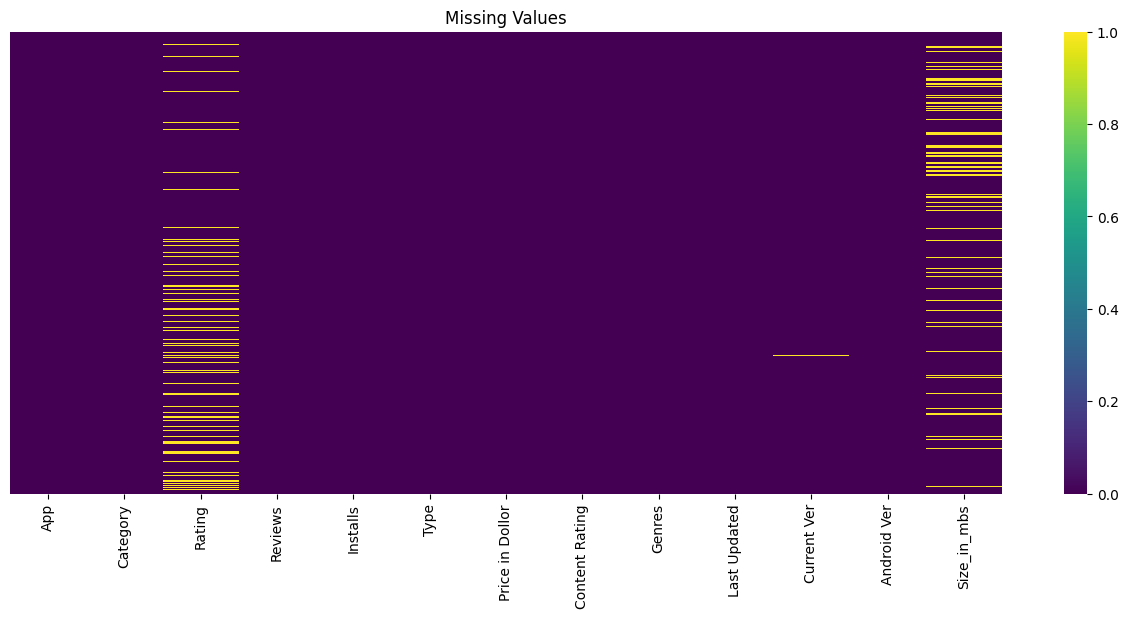

In [140]:
# Let's see the missing values in a plot
# Let's see missing values in a plot
plt.figure(figsize = (16, 6))
sns.heatmap(df.isnull(), cbar = True, yticklabels = False, cmap='viridis')
plt.title('Missing Values')
plt.show()

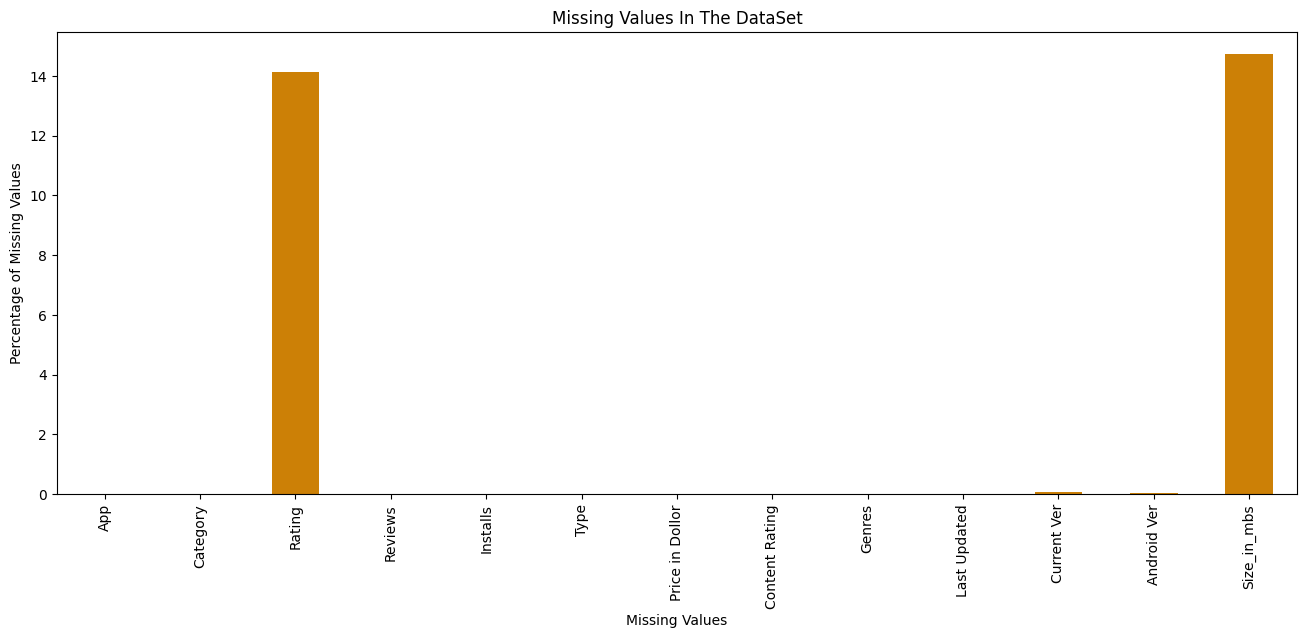

In [141]:
# Let's draw a plot showing percentage of missing values
plt.figure(figsize = (16, 6))
percen_missing_values = round(df.isnull().sum() / len(df) * 100, 2)
percen_missing_values.plot(kind = 'bar', color = '#cc8006')
plt.xlabel('Missing Values')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values In The DataSet')
plt.show()

## Plot the missing values that are less than 1 percent

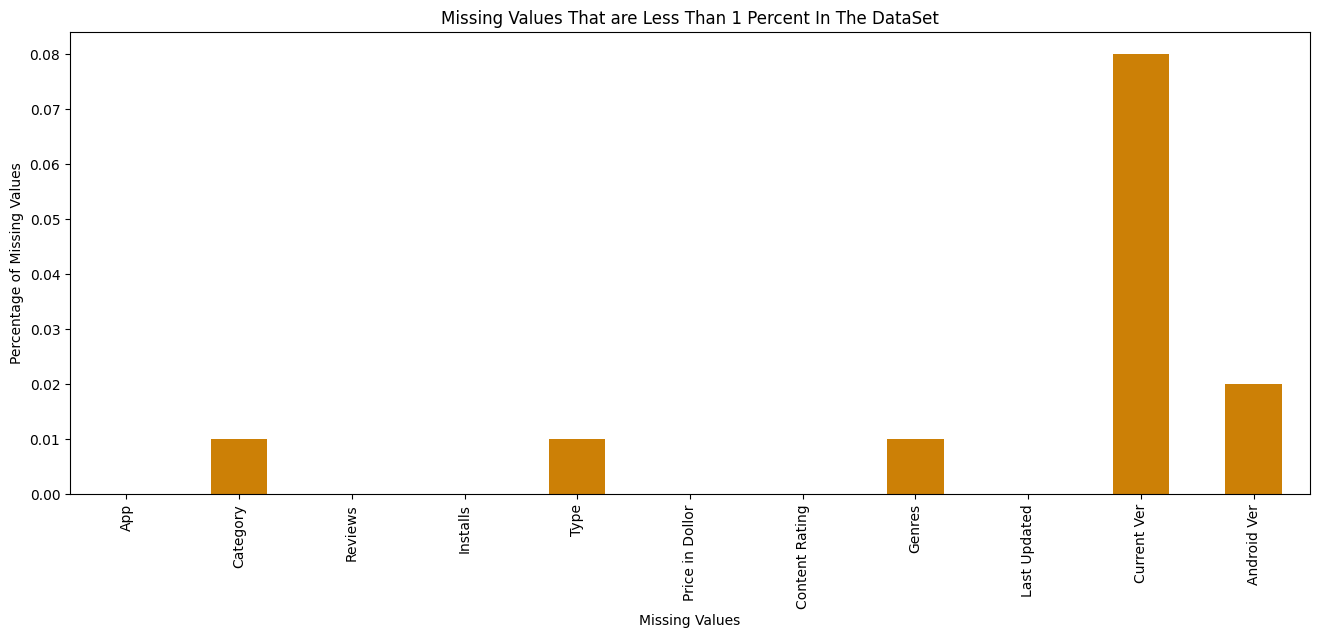

In [142]:
# since we are facing difficulty in visualiaing missing values that are less than 1 percent
plt.figure(figsize = (16, 6))
percen_missing_values[percen_missing_values < 1].plot(kind = 'bar', color = '#cc8006')
plt.xlabel('Missing Values')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values That are Less Than 1 Percent In The DataSet')
plt.show()

In [143]:
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

Size_in_mbs        14.73
Rating             14.14
Current Ver         0.08
Android Ver         0.02
Category            0.01
Type                0.01
Genres              0.01
App                 0.00
Reviews             0.00
Installs            0.00
Price in Dollor     0.00
Content Rating      0.00
Last Updated        0.00
dtype: float64

### Observations

- 1526 missing values in Size_in_mbs column, which are 14.73 percent of the data.
- 1465 missing values in Ratting Column, which are 14.14 percent of the data.
- 8 missing values in Current Ver Column, which are 0.08 percent of the data.
- 2 missing values in Andriod Column, which are 0.02 percent of the data.
- 1 missing value in Category Column, which are 0.01 percent of the data.
- 1 missing value in Type Column, which are 0.01 percent of the data.
- 1 missing value in Genres Column, which are 0.01 percent of the data.
---

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10358 non-null  object 
 1   Category         10357 non-null  object 
 2   Rating           8893 non-null   float64
 3   Reviews          10358 non-null  int64  
 4   Installs         10358 non-null  int64  
 5   Type             10357 non-null  object 
 6   Price in Dollor  10358 non-null  float64
 7   Content Rating   10358 non-null  object 
 8   Genres           10357 non-null  object 
 9   Last Updated     10358 non-null  object 
 10  Current Ver      10350 non-null  object 
 11  Android Ver      10356 non-null  object 
 12  Size_in_mbs      8832 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [145]:
# Let's check the correlation between the numerics columns
numeric_columns = ['Rating', 'Reviews', 'Installs', 'Price in Dollor', 'Size_in_mbs']
df[numeric_columns].corr()

,Rating,Reviews,Installs,Price in Dollor,Size_in_mbs
Rating,1.000000,0.068738,0.050925,-0.022301,0.082339
Reviews,0.068738,1.000000,0.634998,-0.009416,0.237896
Installs,0.050925,0.634998,1.000000,-0.011146,0.168880
Price in Dollor,-0.022301,-0.009416,-0.011146,1.000000,-0.023762
Size_in_mbs,0.082339,0.237896,0.168880,-0.023762,1.000000


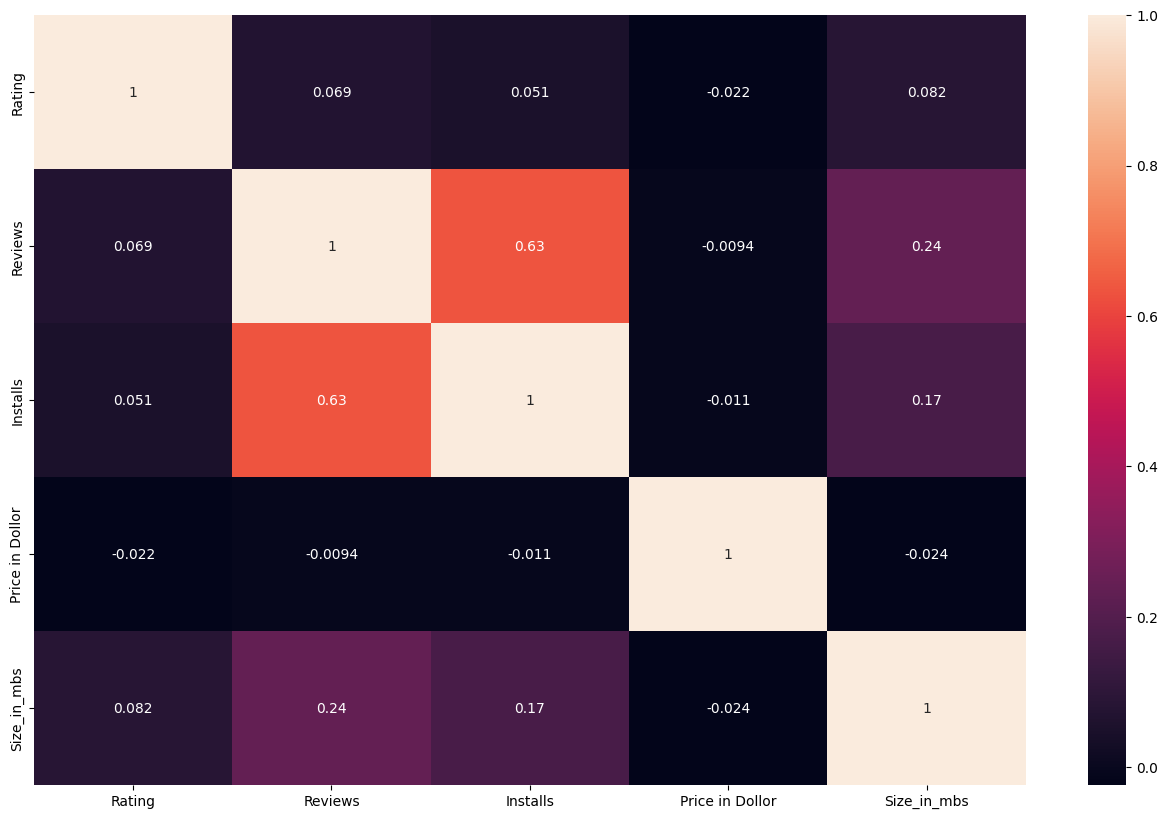

In [146]:
# Let's plot the correlation matrix
plt.figure(figsize = (16, 10))
sns.heatmap(df[numeric_columns].corr(), annot = True)
plt.show()

### Observations

- Lighter color shows the high correlation and darker color shows the low correlation.
- We can see that the Reviews column has a high correlation with the Installs column, which is 0.63 according to correlation, which is quite good.
- This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
---

In [147]:
df.isnull().sum().sort_values(ascending = False)

Size_in_mbs        1526
Rating             1465
Current Ver           8
Android Ver           2
Category              1
Type                  1
Genres                1
App                   0
Reviews               0
Installs              0
Price in Dollor       0
Content Rating        0
Last Updated          0
dtype: int64

### Observations

- Let's remove the null values in 'Current Ver', 'Androidd', 'Category', 'Type' and 'Genres' columns missing values because these missing values are very less in numbers and did not affect our analysis.
---

In [148]:
df.dropna(subset = ['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace = True)

- Now, Only two columns are left with null values. Let's immpute them.

In [149]:
df.isnull().sum().sort_values(ascending = False)

Size_in_mbs        1525
Rating             1460
App                   0
Category              0
Reviews               0
Installs              0
Type                  0
Price in Dollor       0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           0
Android Ver           0
dtype: int64

### Observations

- Only Rating and Size_in_Mb columns are left with missing values.
- We know that we have to be carefull while deadling with Rating column, as it is directly linked with the Installs column.
- In Size columns we already know about Varies with device values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible. 
---

In [150]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price in Dollor,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [151]:
# Let's make a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [152]:
df['Installs_category'].value_counts()

Installs_category
Low                   2129
High                  2003
Very High             1815
More than moderate    1602
Moderate              1499
Top Notch              751
Very low               533
no                      14
Name: count, dtype: int64

In [153]:
# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe().T

Installs_category,no,Very low,Low,Moderate,More than moderate,High,Very High,Top Notch
count,0.0,81.000000,1255.00000,1413.000000,1571.000000,2000.000000,1815.000000,751.000000
mean,NaN,4.637037,4.17004,4.031352,4.094653,4.207100,4.285675,4.372170
std,NaN,0.845199,0.82942,0.605581,0.504221,0.378591,0.301071,0.195374
min,NaN,1.000000,1.00000,1.400000,1.600000,1.800000,2.000000,3.100000
25%,NaN,4.800000,3.80000,3.800000,3.900000,4.000000,4.100000,4.300000
50%,NaN,5.000000,4.40000,4.200000,4.200000,4.300000,4.300000,4.400000
75%,NaN,5.000000,4.80000,4.500000,4.500000,4.500000,4.500000,4.500000
max,NaN,5.000000,5.00000,5.000000,4.900000,4.900000,4.900000,4.800000


In [154]:
df['Rating'].isnull().sum()

1460

In [155]:
# In, which Install_category Ratting has null values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
Low                   874
Very low              452
Moderate               86
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

Text(7, 3.5, 'Null values: 0')

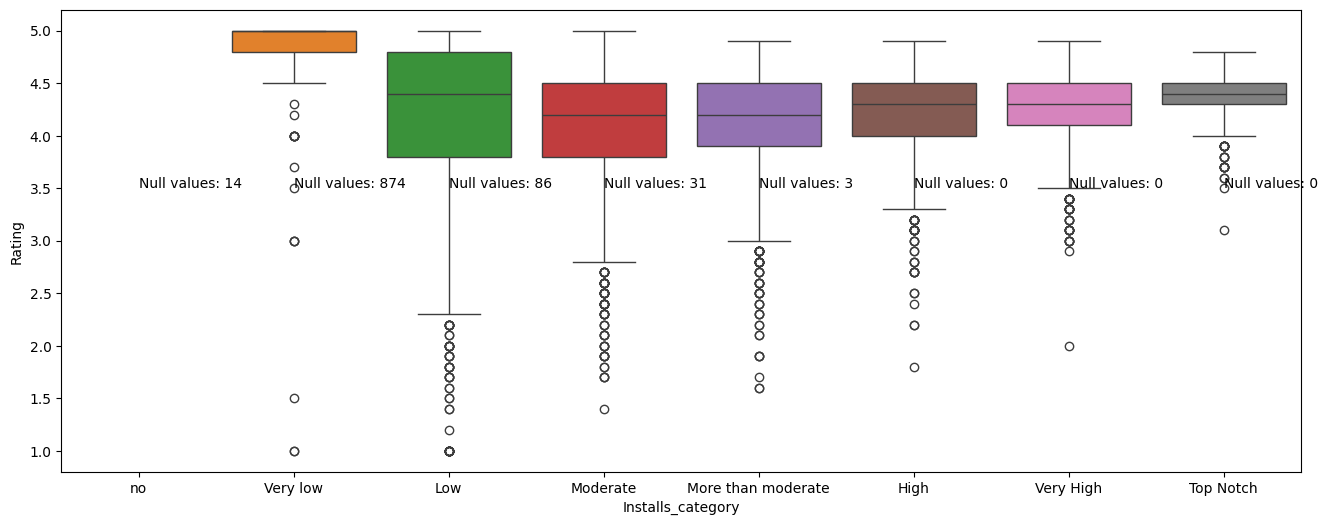

In [156]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) 
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df) 
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

- Let's check if there is any similar link with Reviews as well

In [157]:
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

### Observations

- No null values in the Review Column
---

[]

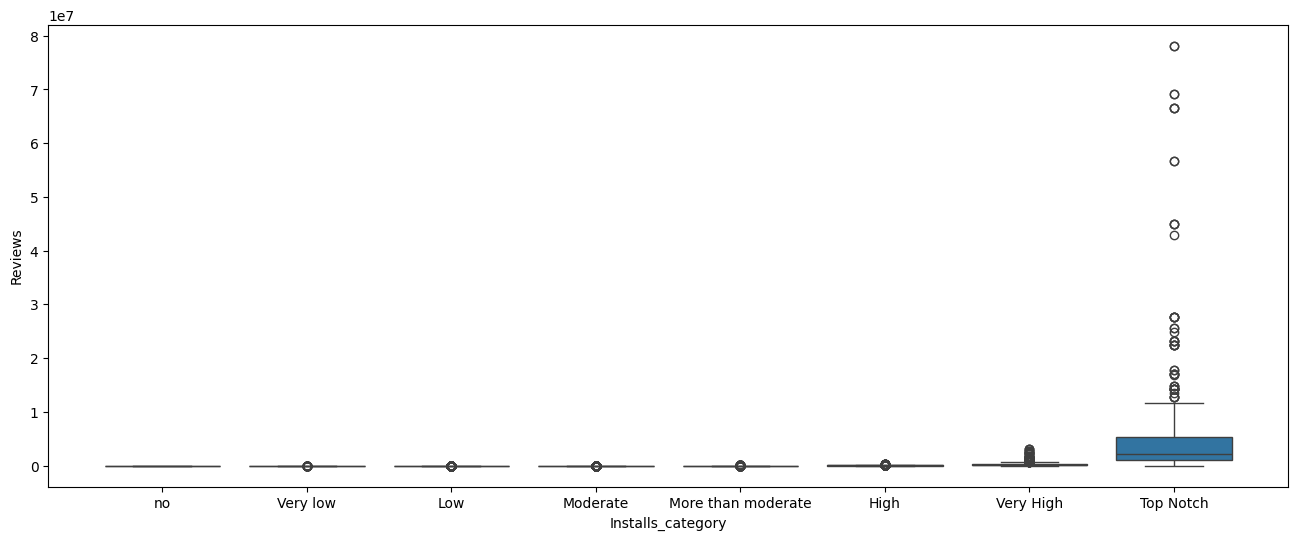

In [158]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) 
sns.boxplot(x='Installs_category', y= 'Reviews', data=df)
plt.plot()

- The data looks really imbalance, let's normalize the data using log transformation

[]

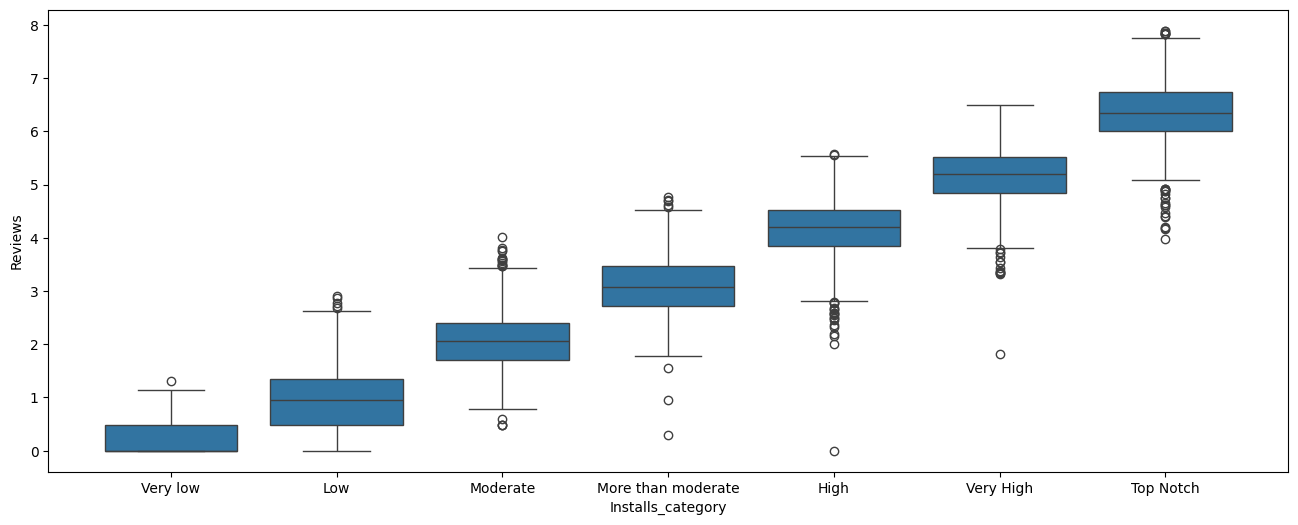

In [159]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) 
sns.boxplot(x='Installs_category', y= np.log10(df['Reviews']), data=df) 
plt.plot()

[]

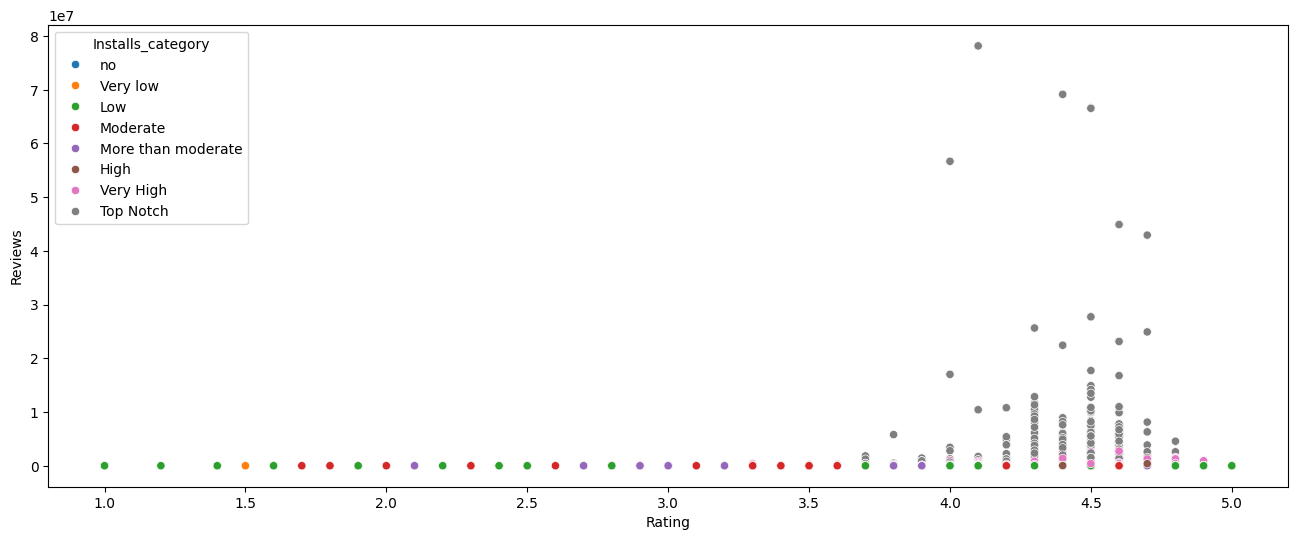

In [160]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) 

sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) 
plt.plot()

### Observations

- It doesn't show any trend, because, you should know that Rating is a categorical variable and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs
---

[]

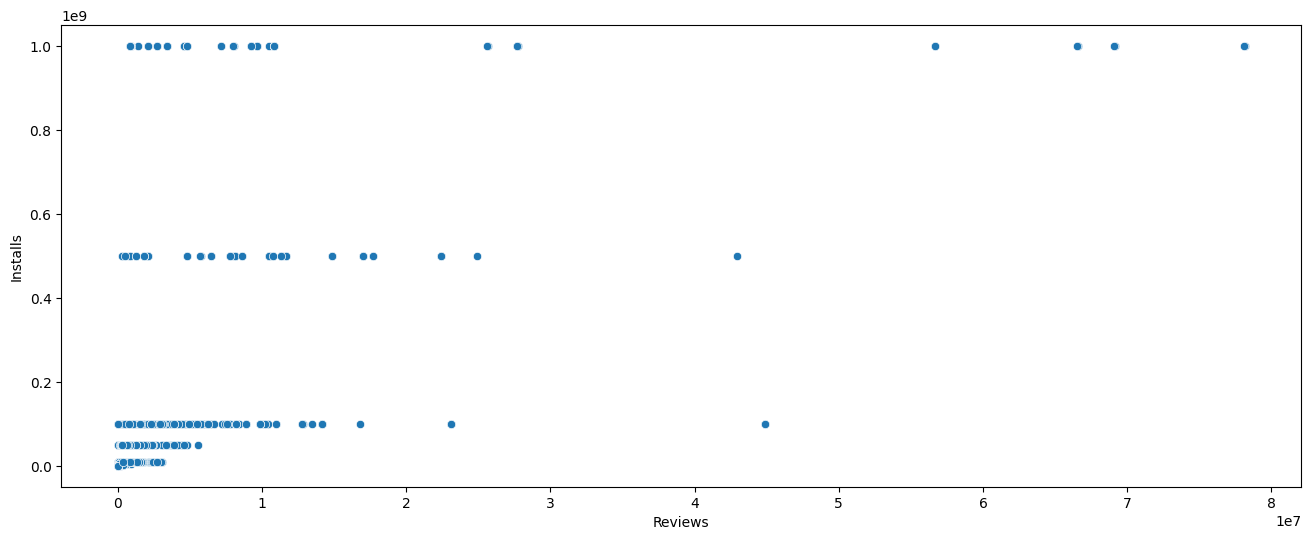

In [161]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Reviews', y='Installs', data=df)
plt.plot()

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

[]

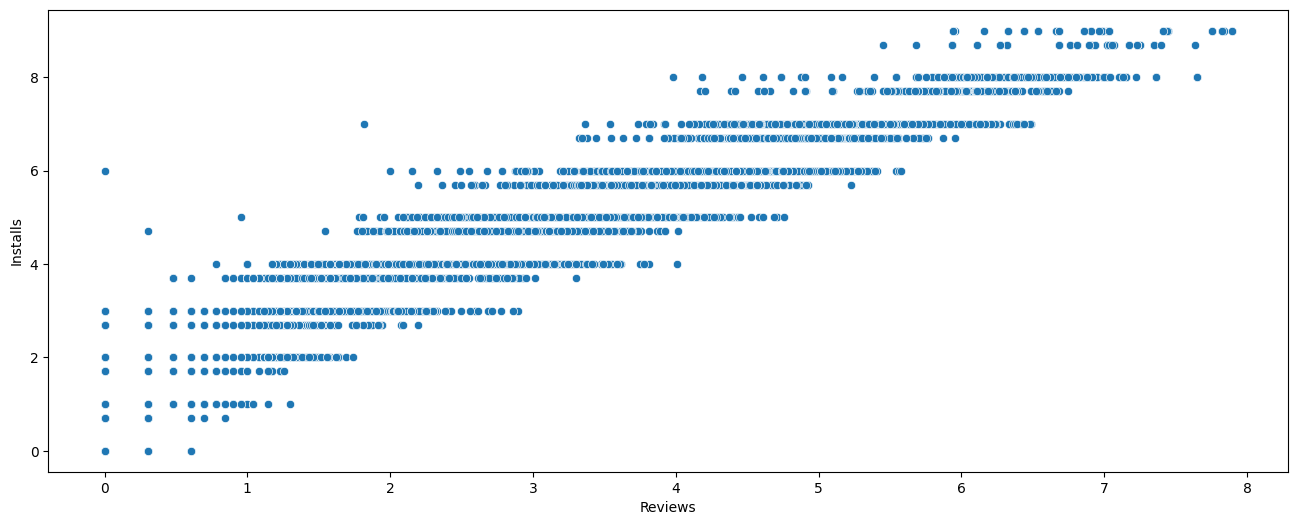

In [162]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) 
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df)
plt.plot()

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

[]

<Figure size 1600x600 with 0 Axes>

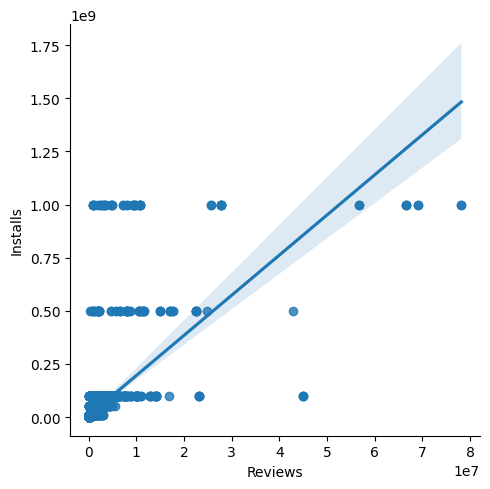

In [163]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) 
sns.lmplot(x='Reviews', y='Installs', data=df) 
plt.plot()

- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

### Observations

- We can see that most of the null values from Rating column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.
---

In [164]:
df.shape

(10346, 14)

# Insights From Data

### Which category has the highest number of apps?

In [165]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price in Dollor,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


In [166]:
df['Category'].value_counts()

Category
FAMILY                 1939
GAME                   1121
TOOLS                   841
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         386
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     229
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
HOUSE_AND_HOME           80
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

- FAMILY Category has the highest number of apps

### Which category has the highest number of installs?

In [167]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price in Dollor,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


In [168]:
df.groupby('Category')['Installs'].sum().sort_values(ascending = False)

Category
GAME                   31544024415
COMMUNICATION          24152276251
SOCIAL                 12513867902
PRODUCTIVITY           12463091369
TOOLS                  11452271905
FAMILY                 10041632405
PHOTOGRAPHY             9721247655
TRAVEL_AND_LOCAL        6361887146
VIDEO_PLAYERS           6222002720
NEWS_AND_MAGAZINES      5393217760
SHOPPING                2573348785
ENTERTAINMENT           2455660000
PERSONALIZATION         2074483782
BOOKS_AND_REFERENCE     1916468576
SPORTS                  1528574498
HEALTH_AND_FITNESS      1361022512
BUSINESS                 863664865
FINANCE                  770348734
MAPS_AND_NAVIGATION      724281890
LIFESTYLE                534823539
EDUCATION                533952000
WEATHER                  426100520
FOOD_AND_DRINK           257898751
DATING                   206536107
HOUSE_AND_HOME           125212461
ART_AND_DESIGN           124333100
LIBRARIES_AND_DEMO        61995910
COMICS                    56086150
AUTO_AND_VE

- GAME Category has the heighest number of installs.

###  Which category has the highest number of reviews?

In [169]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending = False)

Category
GAME                   1415536650
COMMUNICATION           601273552
SOCIAL                  533576829
FAMILY                  396771746
TOOLS                   273181033
PHOTOGRAPHY             204297410
VIDEO_PLAYERS           110380188
PRODUCTIVITY            102554498
SHOPPING                 94931162
PERSONALIZATION          75192744
SPORTS                   65322708
TRAVEL_AND_LOCAL         55565160
ENTERTAINMENT            47570716
NEWS_AND_MAGAZINES       38245873
HEALTH_AND_FITNESS       30845186
MAPS_AND_NAVIGATION      30659254
EDUCATION                23165500
BOOKS_AND_REFERENCE      21873219
FINANCE                  16999891
WEATHER                  14604735
LIFESTYLE                12820575
BUSINESS                 12358171
FOOD_AND_DRINK            7671576
DATING                    5545397
COMICS                    3383276
HOUSE_AND_HOME            2794772
ART_AND_DESIGN            1714385
MEDICAL                   1396757
AUTO_AND_VEHICLES         1163666
LIBRA

- GAME Category has the heighest number of reviews.

### Which category has the highest rating?

In [170]:
round(df.groupby('Category')['Rating'].mean().sort_values(ascending = False), 2)

Category
EVENTS                 4.44
ART_AND_DESIGN         4.38
EDUCATION              4.38
BOOKS_AND_REFERENCE    4.35
PERSONALIZATION        4.33
PARENTING              4.30
GAME                   4.28
BEAUTY                 4.28
HEALTH_AND_FITNESS     4.26
SOCIAL                 4.25
SHOPPING               4.25
WEATHER                4.24
SPORTS                 4.23
PRODUCTIVITY           4.20
FAMILY                 4.19
AUTO_AND_VEHICLES      4.19
PHOTOGRAPHY            4.18
MEDICAL                4.18
LIBRARIES_AND_DEMO     4.18
HOUSE_AND_HOME         4.16
FOOD_AND_DRINK         4.16
COMICS                 4.16
COMMUNICATION          4.15
ENTERTAINMENT          4.14
NEWS_AND_MAGAZINES     4.13
FINANCE                4.13
BUSINESS               4.10
LIFESTYLE              4.10
TRAVEL_AND_LOCAL       4.09
VIDEO_PLAYERS          4.06
MAPS_AND_NAVIGATION    4.05
TOOLS                  4.05
DATING                 3.97
Name: Rating, dtype: float64

- EVENTS Category has the maximum ratings of 4.44.

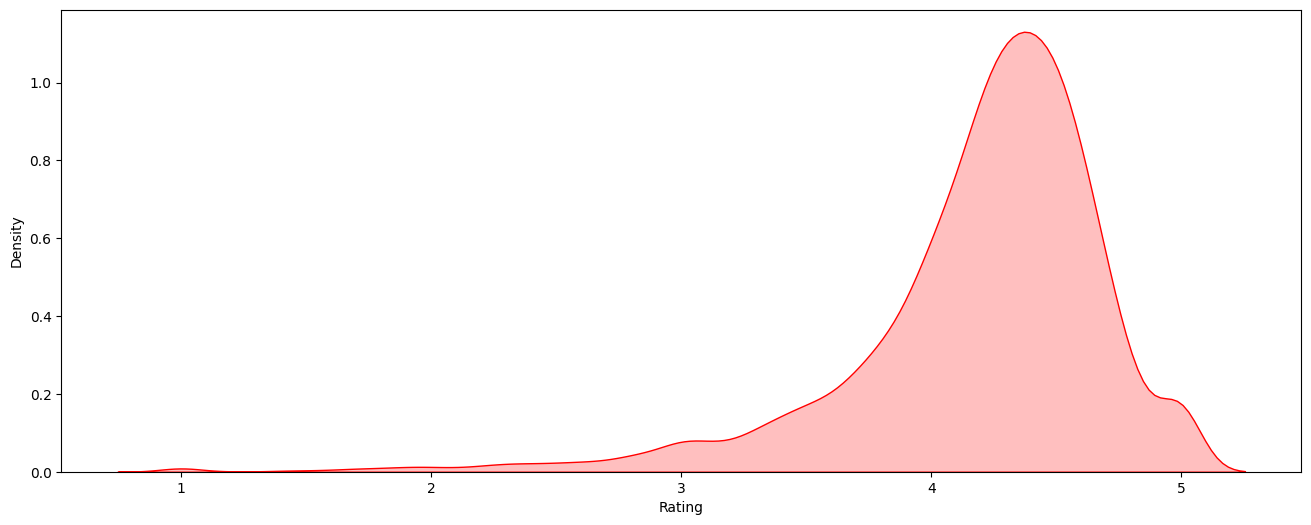

In [171]:
# Let's check the range of rating using a kdeplot
plt.figure(figsize = (16, 6))
sns.kdeplot(df['Rating'], color = 'red', shade = True)
plt.show()

### Is there a relationship between the size of an app and its rating on the Play Store?

In [172]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price in Dollor,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


In [173]:
df[['Size_in_mbs', 'Rating']].corr()

,Size_in_mbs,Rating
Size_in_mbs,1.000000,0.081874
Rating,0.081874,1.000000


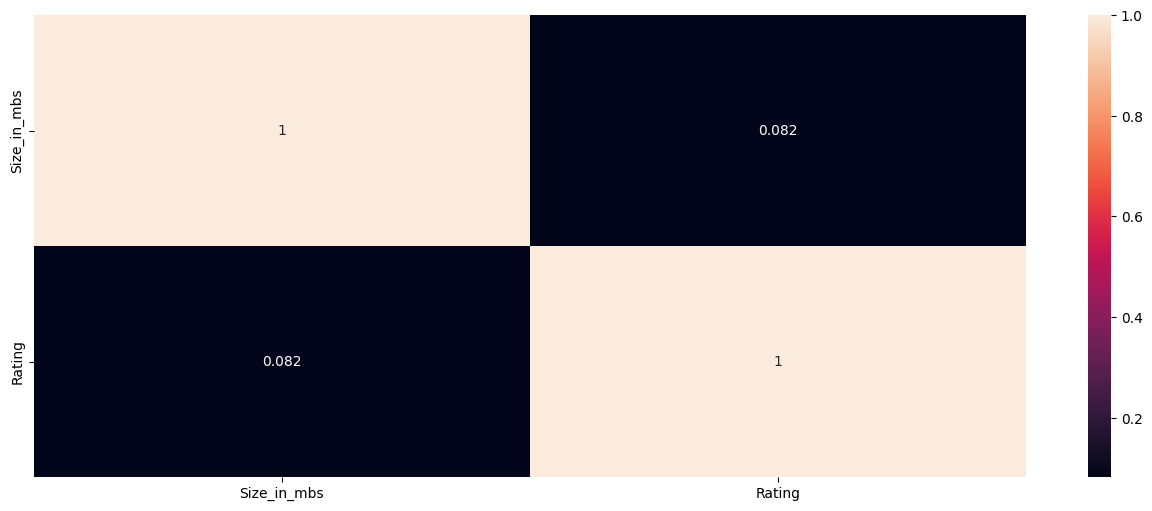

In [174]:
plt.figure(figsize = (16, 6))
sns.heatmap(df[['Size_in_mbs', 'Rating']].corr(), annot = True, cbar =True)
plt.show()

- There is no correlation between Size and Rating.

### How do app prices influence the number of installations.

In [175]:
df.head(2)

,App,Category,Rating,Reviews,Installs,Type,Price in Dollor,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High


In [176]:
df.groupby('Price in Dollor')['Installs'].sum().sort_values(ascending = False)

Price in Dollor
0.00      146561162546
6.99          21133100
0.99          20337363
2.99          10290022
1.99           4001131
              ...     
28.99                1
154.99               0
200.00               0
30.99                0
394.99               0
Name: Installs, Length: 92, dtype: int64

- Apps which are Free to use have the maximum number of installation.
- When prices of app starting to increase installation rate starting to decrease.
- The price with $28.99 has only 1 install.
- The app with prices greater than $28.99 have no installtions.

### What is the average rating of paid apps compared to free apps on the Play Store?

In [177]:
df.head(2)

,App,Category,Rating,Reviews,Installs,Type,Price in Dollor,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High


In [178]:
paid_apps_avg_rating = round(df[df['Price in Dollor'] > 0]['Rating'].mean(), 2)
free_apps_avg_rating = round(df[df['Price in Dollor'] == 0]['Rating'].mean(), 2)

print("Average rating of paid apps:", paid_apps_avg_rating)
print("Average rating of free apps:", free_apps_avg_rating)

Average rating of paid apps: 4.26
Average rating of free apps: 4.18


- Average rating of paid apps is greater than free apps.

### What is the distribution of app ratings across different categories?

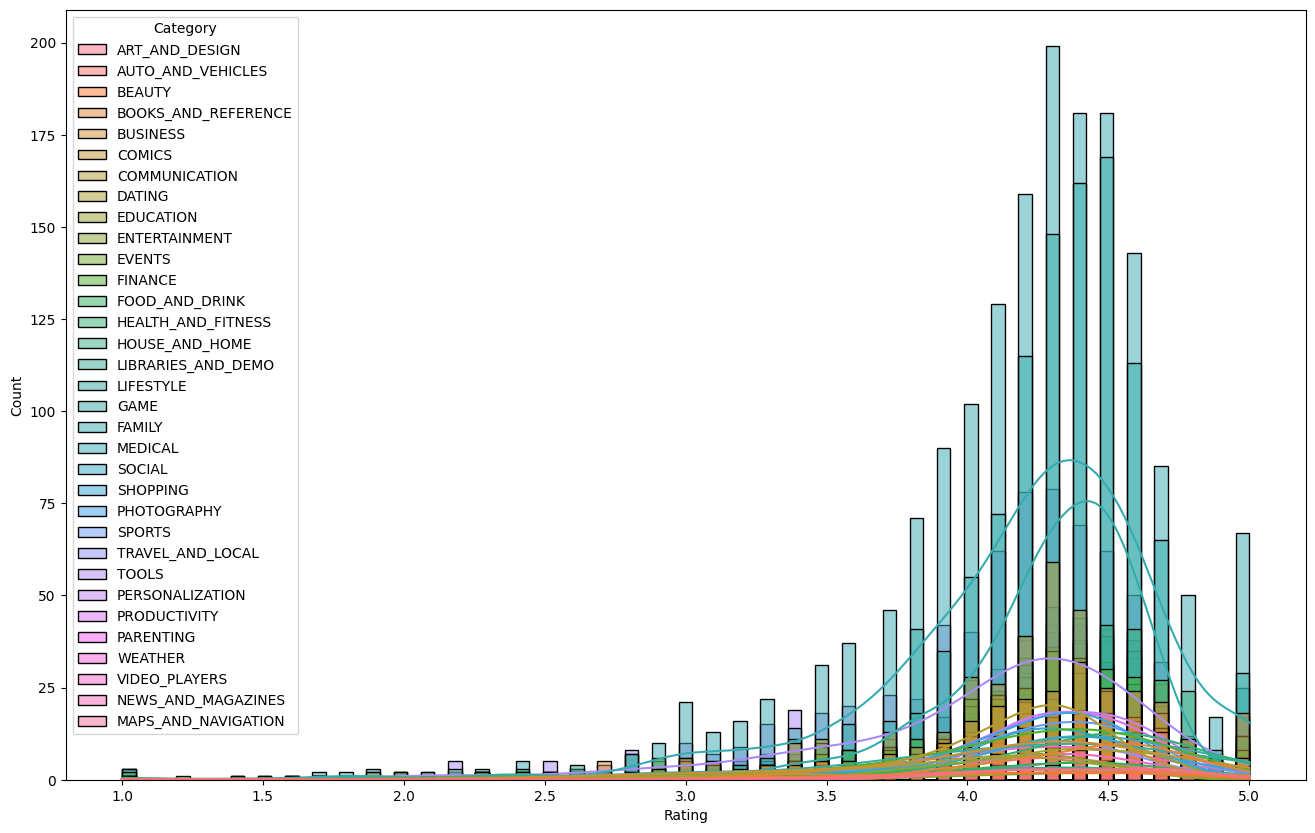

In [179]:
plt.figure(figsize = (16, 10))
sns.histplot(data = df, x = 'Rating', hue = 'Category', kde = True)
plt.show()

### What is the average size of an app?

In [180]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price in Dollor,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


In [181]:
round(df['Size_in_mbs'].mean(), 2)

21.31

- The average size of app is 21.31 MB's.

### What is the average size of Gaming apps and Number of installations?

In [182]:
df['Category'].value_counts()

Category
FAMILY                 1939
GAME                   1121
TOOLS                   841
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         386
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     229
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
HOUSE_AND_HOME           80
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [183]:
round(df[df['Category'] == 'GAME']['Size_in_mbs'].mean(), 2)

44.13

- The average size of game is 44.13 Mb's

In [184]:
df[df['Category'] == 'GAME']['Installs'].sum()

31544024415

- Total number odf installation of Game App's is 31544024415.

### What is the total numbers of installs of PUBG MOBILE game?

In [185]:
df[df['App'] == 'PUBG MOBILE']['Installs'].sum()

200000000

In [186]:
df[df['App'] == 'PUBG MOBILE']['Installs_category']

1785    Top Notch
1794    Top Notch
1847    Top Notch
4145    Top Notch
Name: Installs_category, dtype: category
Categories (8, object): ['no' < 'Very low' < 'Low' < 'Moderate' < 'More than moderate' < 'High' < 'Very High' < 'Top Notch']

- PUBG MOBILE have 200000000 installs and falls in Top Notch Category of Installs.

### Free top 5 rated apps?

In [187]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price in Dollor,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


In [188]:
df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Installs,Type,Price in Dollor,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs,Installs_category
9290,EF Forms,BUSINESS,5.0,2,50,Free,0.0,Everyone,Business,"July 24, 2018",1.29,4.4 and up,23.0,Low
7170,Yazdani Cd Center EllahAbad Official App,FAMILY,5.0,8,500,Free,0.0,Everyone,Entertainment,"January 12, 2018",2.0,4.0 and up,3.8,Low
6398,BK Gold App,FINANCE,5.0,4,50,Free,0.0,Everyone,Finance,"May 25, 2018",1.0.0,4.4 and up,11.0,Low
10629,Florida Wildflowers,FAMILY,5.0,5,1000,Free,0.0,Everyone,Education,"July 10, 2017",1.5,4.1 and up,69.0,Low
9659,FAST EO,EVENTS,5.0,1,10,Free,0.0,Everyone,Events,"May 15, 2018",1.0.3,4.1 and up,NaN,Very low


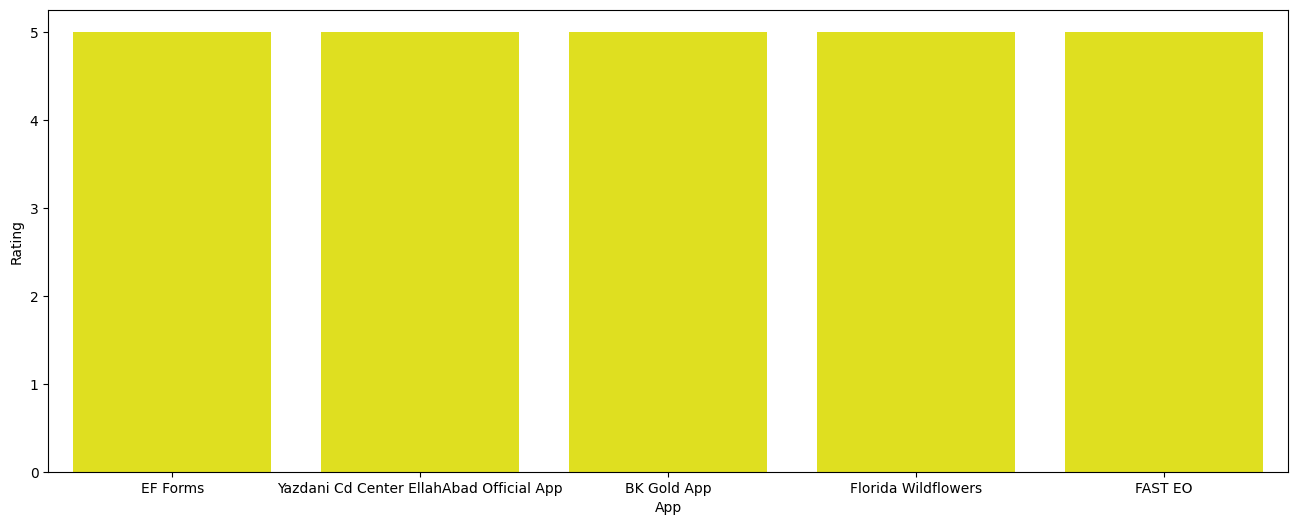

In [190]:
# Let's make a plot
plt.figure(figsize=(16, 6)) 
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5), color = 'yellow')
plt.show()

### Top paid 5 rated apps?

In [192]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Installs,Type,Price in Dollor,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs,Installs_category
9010,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13,100,Paid,1.49,Everyone,Personalization,"April 4, 2017",1.2,2.3 and up,0.488281,Low
7466,211:CK,GAME,5.0,8,10,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up,38.000000,Very low
5917,Ra Ga Ba,GAME,5.0,2,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,20.000000,Very low
5263,AJ Blue Icon Pack,PERSONALIZATION,5.0,4,50,Paid,0.99,Everyone,Personalization,"April 27, 2018",1.1,4.1 and up,31.000000,Low
5260,AJ Gray Dark Icon Pack,PERSONALIZATION,5.0,2,10,Paid,0.99,Everyone,Personalization,"April 29, 2018",1.1,4.1 and up,35.000000,Very low


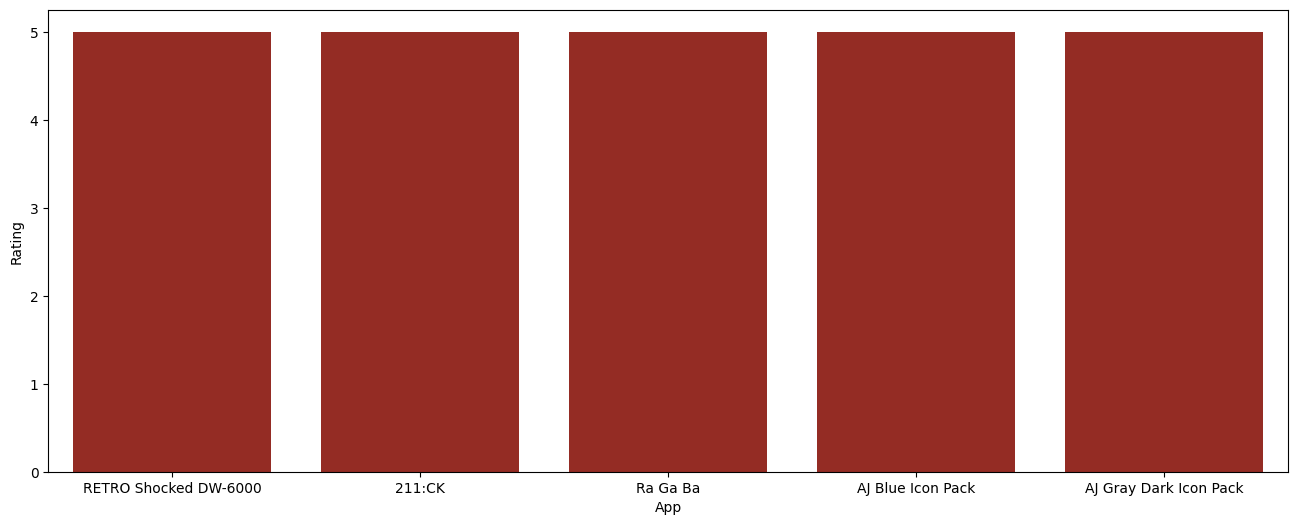

In [195]:
# Let's plot them
plt.figure(figsize=(16, 6))
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5), color = '#a61c12')
plt.show()

### Top free app having highest reviews?

In [197]:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Installs,Type,Price in Dollor,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mbs,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,Top Notch


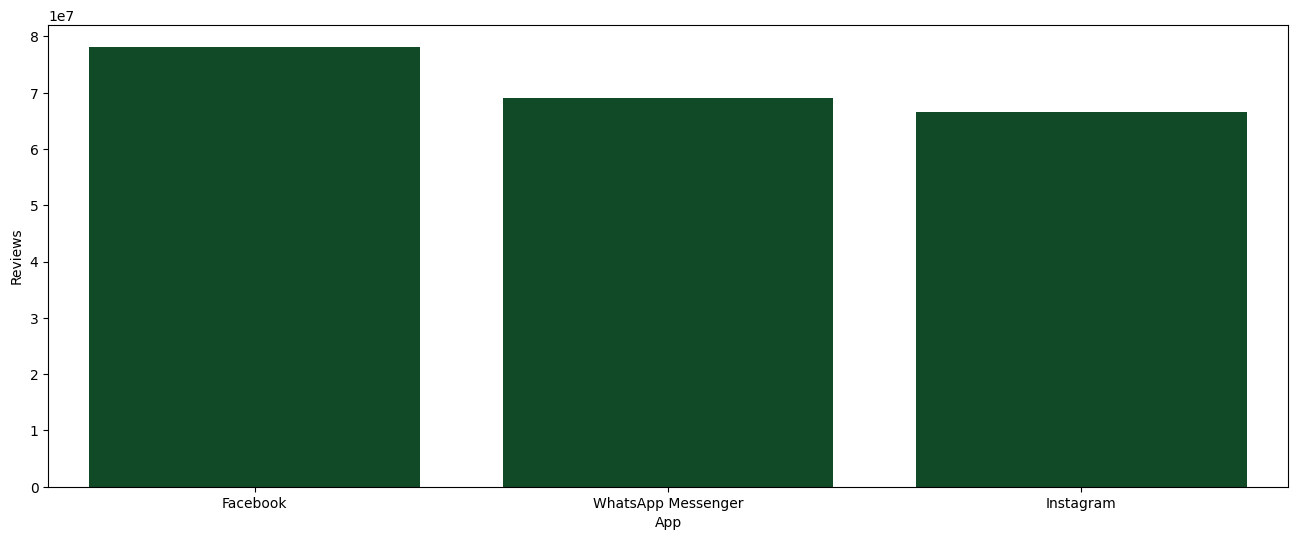

In [199]:
# Let's make a plot
plt.figure(figsize=(16, 6)) 
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5), color = '#065425')
plt.show()

# Conclusions

- FAMILY Category has the highest number of Apps.
- Games have the highest number of Installations.
- Games also  have the highest number of Reviews.
- Games also have the highest number of Ratings.
- There is no relationship between Size of an app and its rating.
- Yes. The price of an app influences the number of installs:
   - Free app have max number of installations.
   - Paid app with fee of $29.99 have only one install.
   - Above $29.99 apps have 0 installations.
- Average rating of paid apps is 4.28.
- Average size of an app is 21.31 MB's.
- Average Size of a gamming app is 41.13 Mb's and have 31544024415 installations.
- Number of installations of PUBG MOBILE app is 200000000 and falls in Top Notch Category of Install_categories.
- Top 3 free 5 rated apps:
  1. EF FORMS
  2. Yazdeni Cd Center Ellahbad Official App
  3. BK Bold App
- Top 3 paid 5 rated apps:
  1. RETRO Shocked DW-6000
  2. 211:Ck
  3. Ra Ga Ba App 
- Top 3 free apps with highest reviews:
  1. Facebook
  2. WhatsApp Messenger App
  3. Instagram